In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [2]:
data = np.genfromtxt("data_DMAP_PCA_vadere.txt", dtype='double')
print(f"Shape: {data.shape}")
print(f"Head:\n{data[:10]}")

Shape: (1000, 30)
Head:
[[ 7.6827459  16.59013494 13.48382465 16.51630336  4.09463337 12.94789591
   6.18520861 14.05182738  2.38475033 11.90640152  2.97632587  9.77760483
  14.60812295 17.09726857 14.83430839 18.04681822  9.43799959 16.67324233
   3.80880028  8.46192526  7.61803753 14.83000844  5.79351695  7.08561292
  13.16538662 18.27629557 10.98046407 17.09617936  5.90601637 15.32255011]
 [ 8.14553521 16.64840919 13.27720784 16.32854299  4.04456352 12.74760675
   6.03943416 14.42058457  2.1588189  11.83364991  2.99566259  9.57810206
  14.95613142 17.40936996 14.7963167  17.66234017  9.43866208 16.66898046
   4.16672983  8.39446831  7.30781961 14.95774938  5.54179469  7.21293348
  13.2091823  18.19522171 11.20285906 17.30546241  5.82218956 15.6793479 ]
 [ 7.88737011 16.50898935 13.48175464 16.02865748  3.81941289 13.02175097
   5.86548659 14.15677291  1.98708662 11.67543617  2.84128761  9.67313793
  14.55330811 16.60730233 15.14437067 18.0486582   8.99404244 16.38293638
   4.0359516

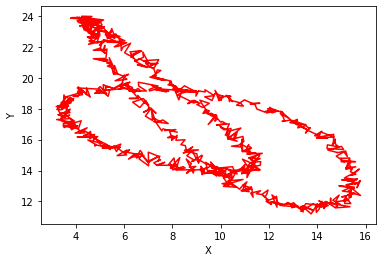

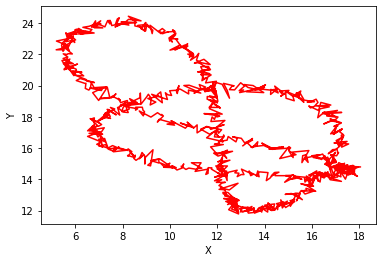

In [3]:
plt.plot(data[:,0], data[:,1], color='red');
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(data[:,2], data[:,3], color='red');
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [4]:
means = np.mean(data, axis=0)
print(means)
centered_matrix = data - means

[ 8.69041656 17.18480439 11.83138656 17.46090772  5.97749744 13.98085094
  3.97491327 12.31694551  2.31034721 13.04555703  0.45787602 11.60150539
 15.94253783 14.96617203 13.68292236 16.51240386 11.55586342 14.77256557
  1.82325102  7.32666437  5.62951604 16.15697193  3.91610671  6.87614398
 13.83507357 18.60590247 13.25736928 18.8600689   4.56612049 17.65733972]


In [5]:
def calculate_pca(pc_count):
    U, S, Vt = linalg.svd(centered_matrix)

    U = U[:, 0:pc_count]

    sigma = np.zeros((U.shape[1], Vt.shape[0]))
    for i in range(min(sigma.shape[0], sigma.shape[1])):
        sigma[i, i] = S[i]

    pca_matrix = centered_matrix.dot(Vt.T)
    pca_components = Vt
    pca_variance = np.var(pca_matrix, axis=0)
    pca_variance_ratio = pca_variance / np.sum(pca_variance)

    reconstructed_data= np.dot(U, np.dot(sigma, Vt))

    plt.plot(reconstructed_data[:,0], reconstructed_data[:,1], color='red');
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    plt.plot(reconstructed_data[:,2], reconstructed_data[:,3], color='red');
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    print(f"Explained Variance Ratio: {pca_variance_ratio[0:pc_count]}")
    print(f"Sum of Explained Variance ratios (Total Energy Captured): {np.sum(pca_variance_ratio[0:pc_count])}")

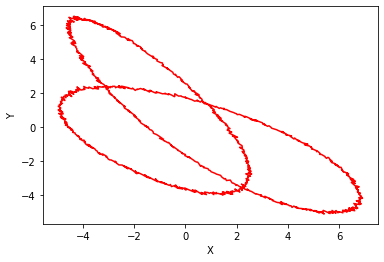

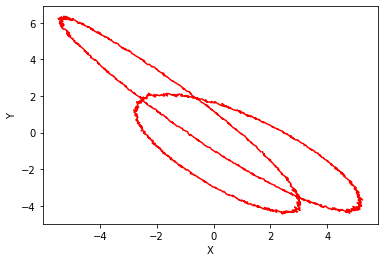

Explained Variance Ratio: [0.47330561 0.37594081]
Sum of Explained Variance ratios (Total Energy Captured): 0.8492464226063752


In [6]:
calculate_pca(2)

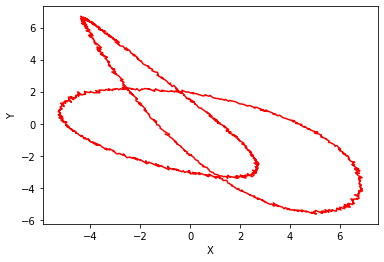

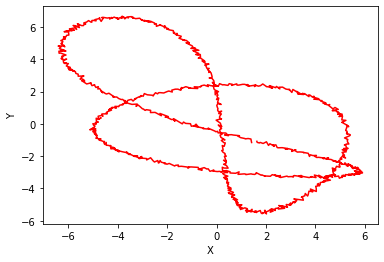

Explained Variance Ratio: [0.47330561 0.37594081 0.14788461]
Sum of Explained Variance ratios (Total Energy Captured): 0.9971310341299295


In [7]:
calculate_pca(3)